In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
eps = np.finfo(float).eps
from numpy import log2 as log
from pprint import pprint
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/health care analysis/archive (1).zip')

In [6]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
df.shape


(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Categorical variables: []


In [12]:
# Count the number of categorical and numerical variables
categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 0
Number of numerical variables: 9


In [13]:
# Unique values for categorical features
print(df.select_dtypes(include=['object']).nunique())

Series([], dtype: float64)


In [14]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [15]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/768)*100})
missing_data


,total_missing,perc_missing
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

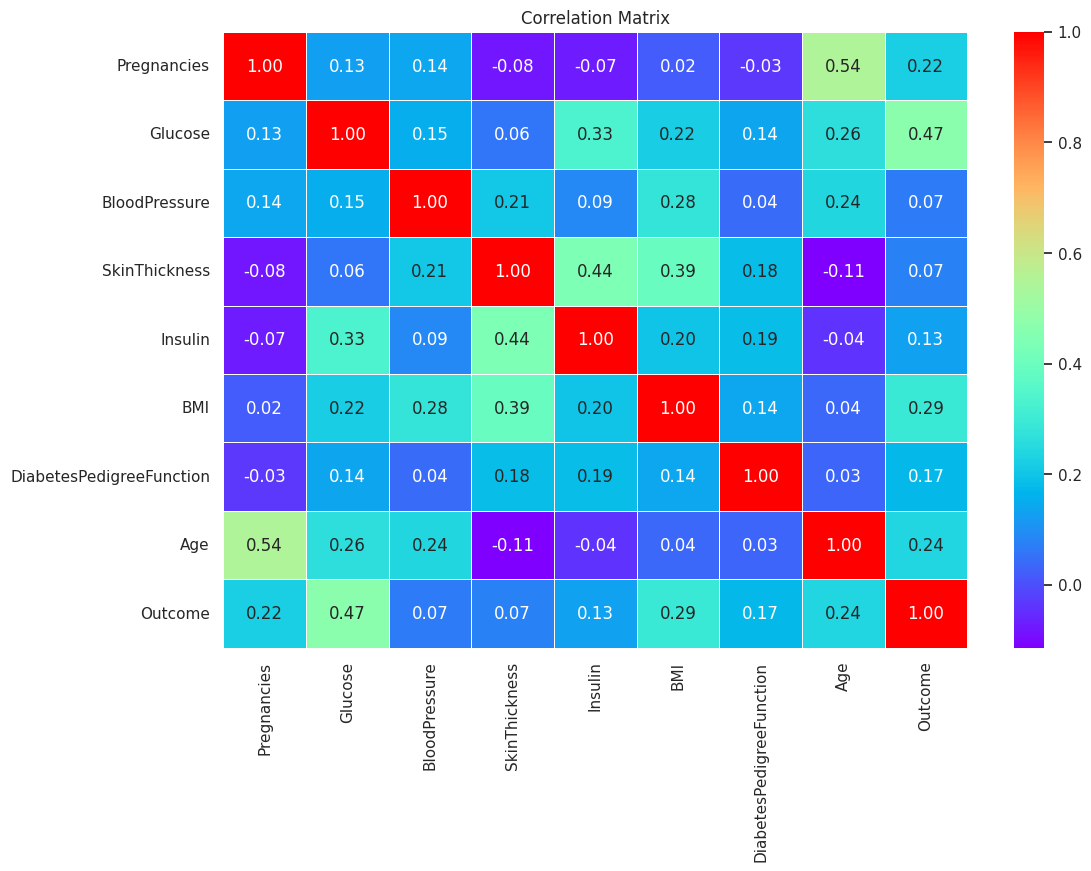

In [17]:
# Correlation matrix
# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

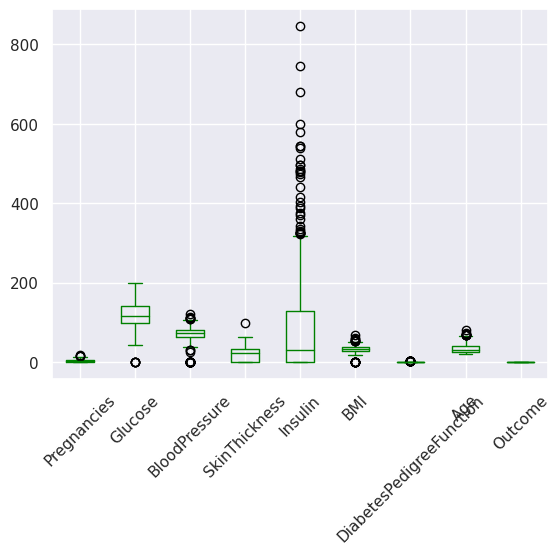

In [19]:
# Plot the boxplot with rotated text labels
df.plot(kind='box', rot=45,color='green')

plt.show()

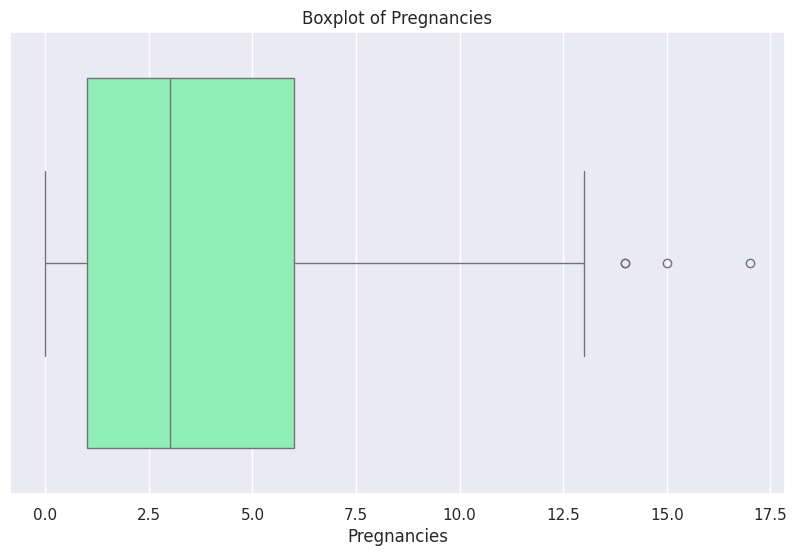

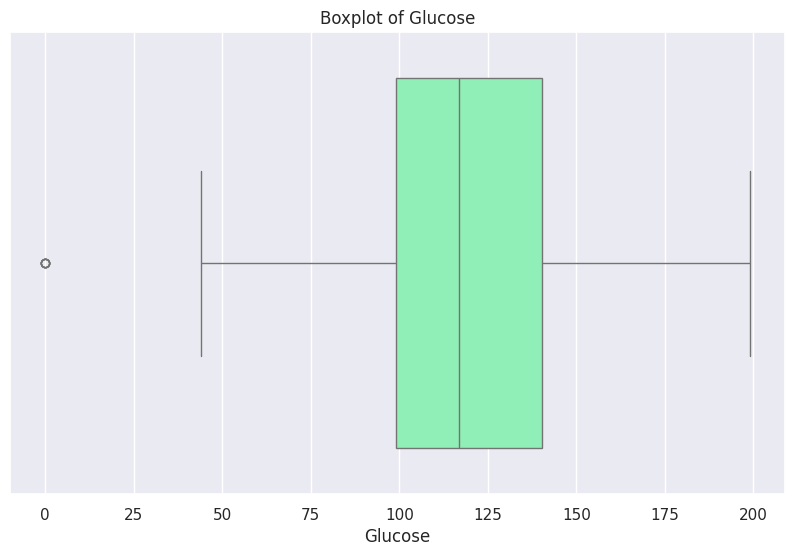

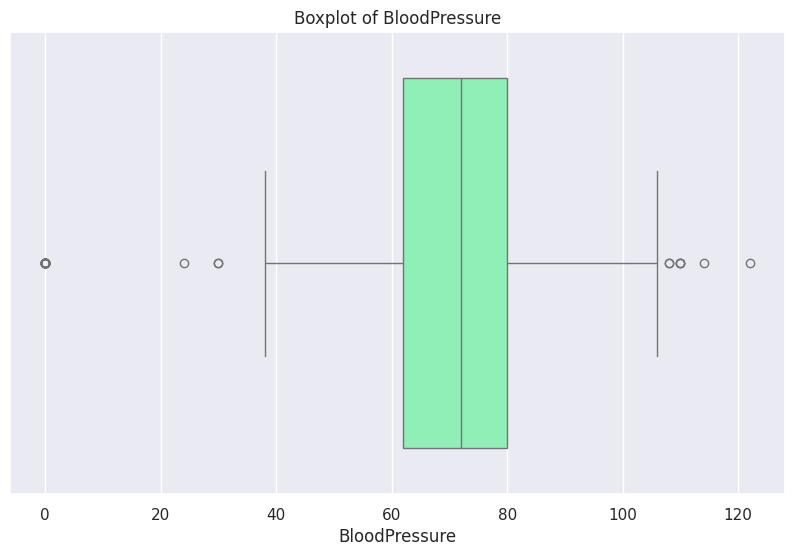

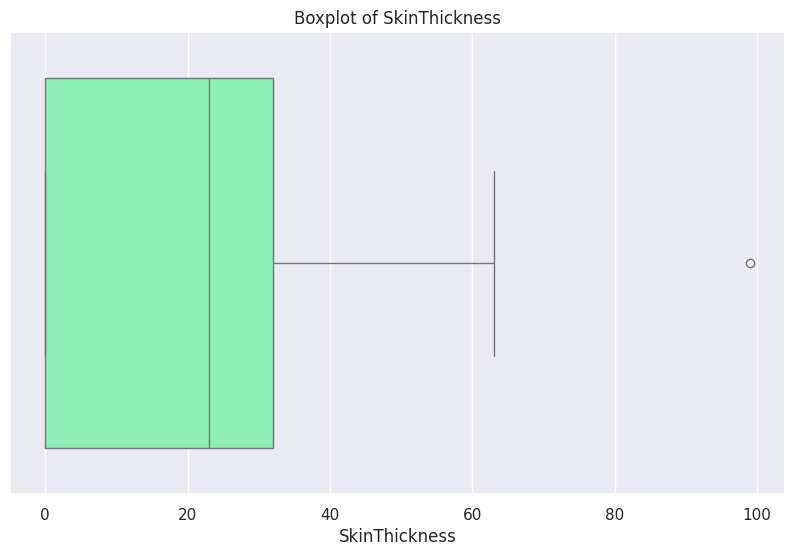

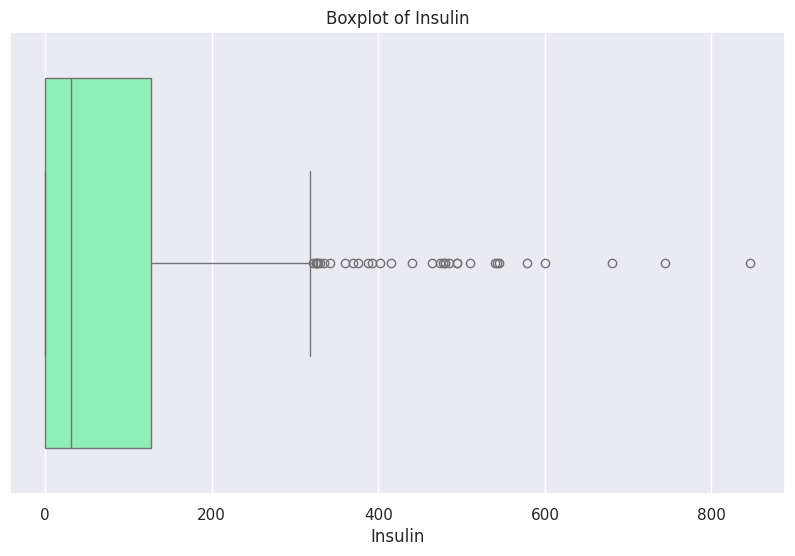

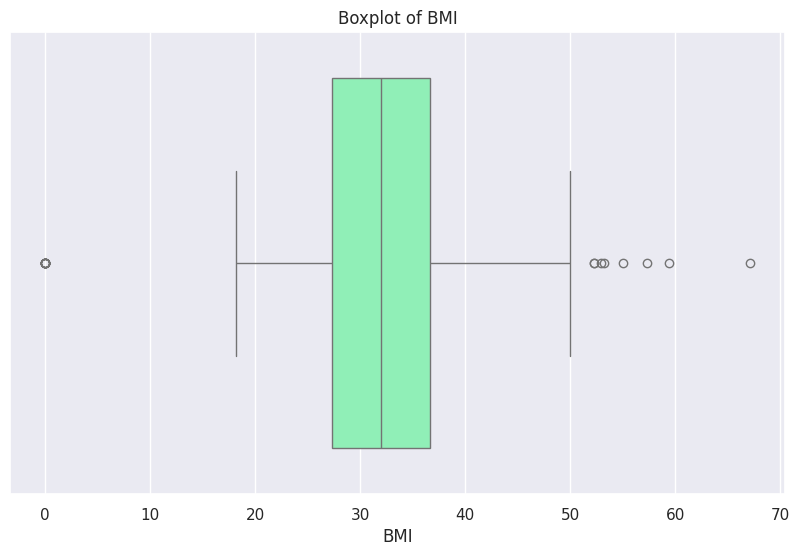

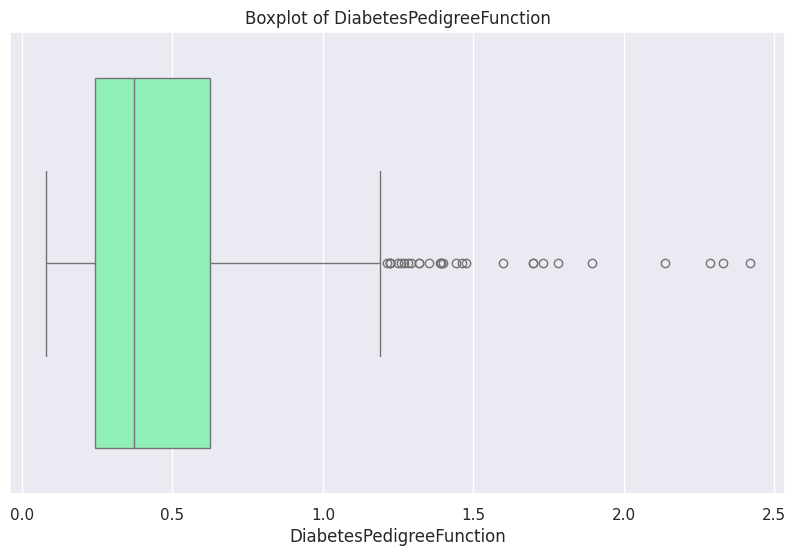

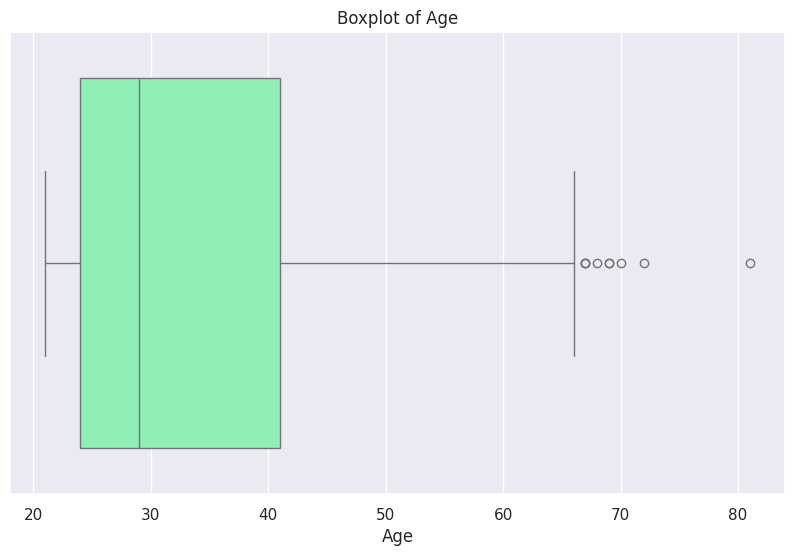

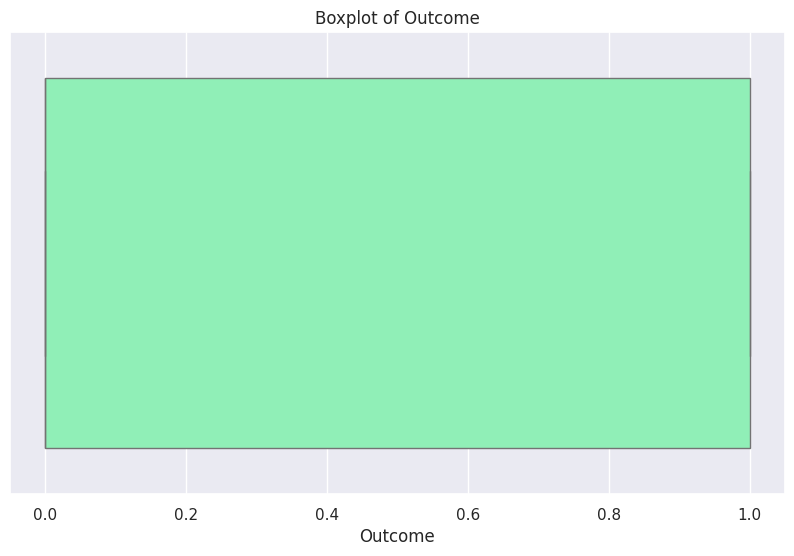

In [22]:
# Filter numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()

In [23]:
df_d0 = df[df['Outcome'] == 0]
df_d1 = df[df['Outcome'] == 1]

df_d0_samp = df_d0.sample(268,replace = False)
df_bal = pd.concat([df_d1, df_d0_samp])

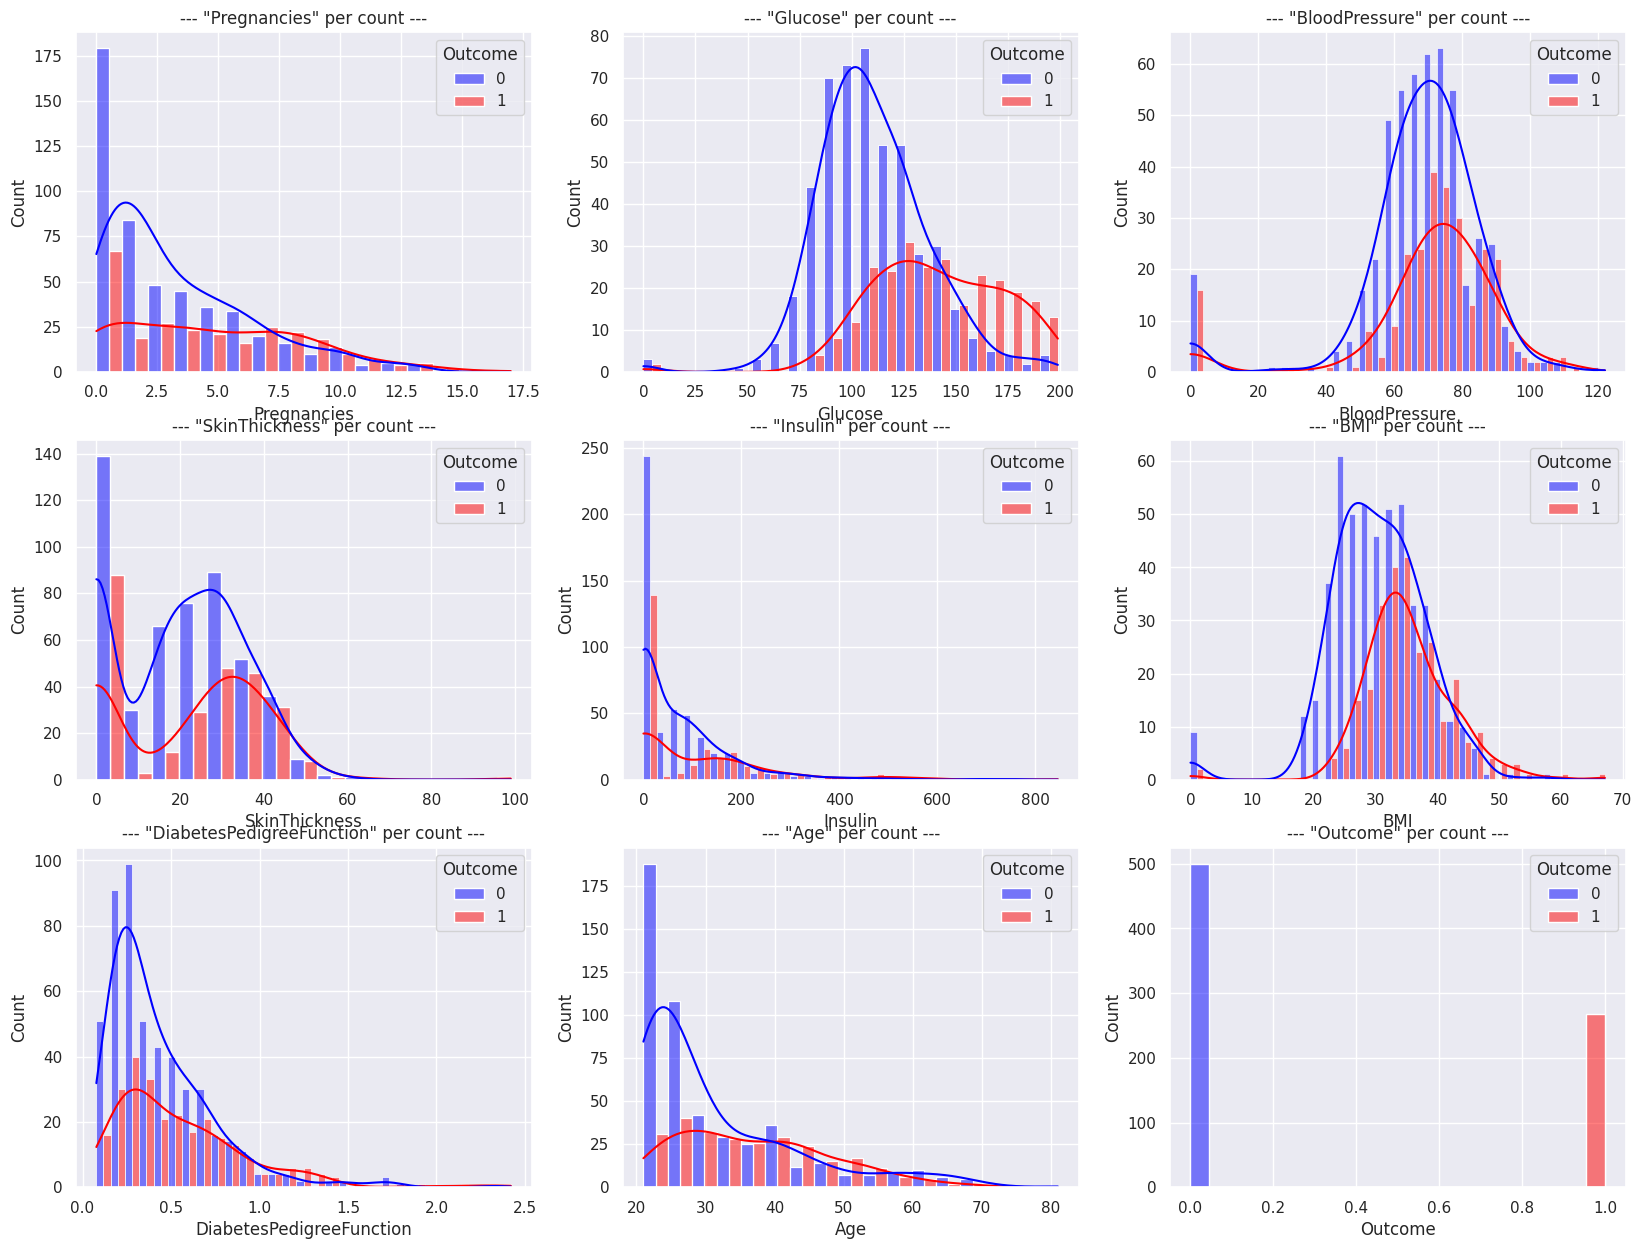

In [24]:
def look_at_distr_hist(*args, df_num=None, df_cat=None, class_feature="Outcome"):
    if df_num is not None:
        plt.figure(figsize = [20, 15])
        counter = 0
        for i in df_num.columns:
            counter += 1
            plt.subplot(3, 3, counter)
            sns.histplot(data = df, x = df[str(i)], hue = df[class_feature], multiple  = 'dodge', palette={0: 'blue', 1: 'red'}, kde=True)
            plt.title(f'--- "{i}" per count ---')
        plt.plot()
look_at_distr_hist(df_num=df_bal, class_feature="Outcome")